In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Load dataset (update with actual file path)
df = pd.read_csv("/Users/ElizabethMitsch/Desktop/Advanced ML/Final Project/diabetes_dataset.csv")  

# Display basic information
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Drop missing values if necessary
df.dropna(inplace=True)

df = df.drop(columns=['Unnamed: 0'], errors='ignore')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Unnamed: 0            253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [12]:
# Identify binary columns (containing only 0s and 1s)
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

# Compute percentage of 1s for binary columns
binary_percentages = df[binary_cols].mean() * 100

# Identify non-binary columns (more than 2 unique values)
non_binary_cols = [col for col in df.columns if df[col].nunique() > 2]

# Compute average for non-binary columns
non_binary_averages = df[non_binary_cols].mean()

# Display results
print("Percentage of 1s in binary columns:")
print(binary_percentages)

print("\nAverage values for non-binary columns:")
print(non_binary_averages)

Percentage of 1s in binary columns:
HighBP                  42.900110
HighChol                42.412094
CholCheck               96.266950
Smoker                  44.316856
Stroke                   4.057080
HeartDiseaseorAttack     9.418559
PhysActivity            75.654368
Fruits                  63.425576
Veggies                 81.141990
HvyAlcoholConsump        5.619678
AnyHealthcare           95.105251
NoDocbcCost              8.417692
DiffWalk                16.822375
Sex                     44.034216
targets                 13.933302
dtype: float64

Average values for non-binary columns:
BMI          28.382364
GenHlth       2.511392
MentHlth      3.184772
PhysHlth      4.242081
Age           8.032119
Education     5.050434
Income        6.053875
dtype: float64


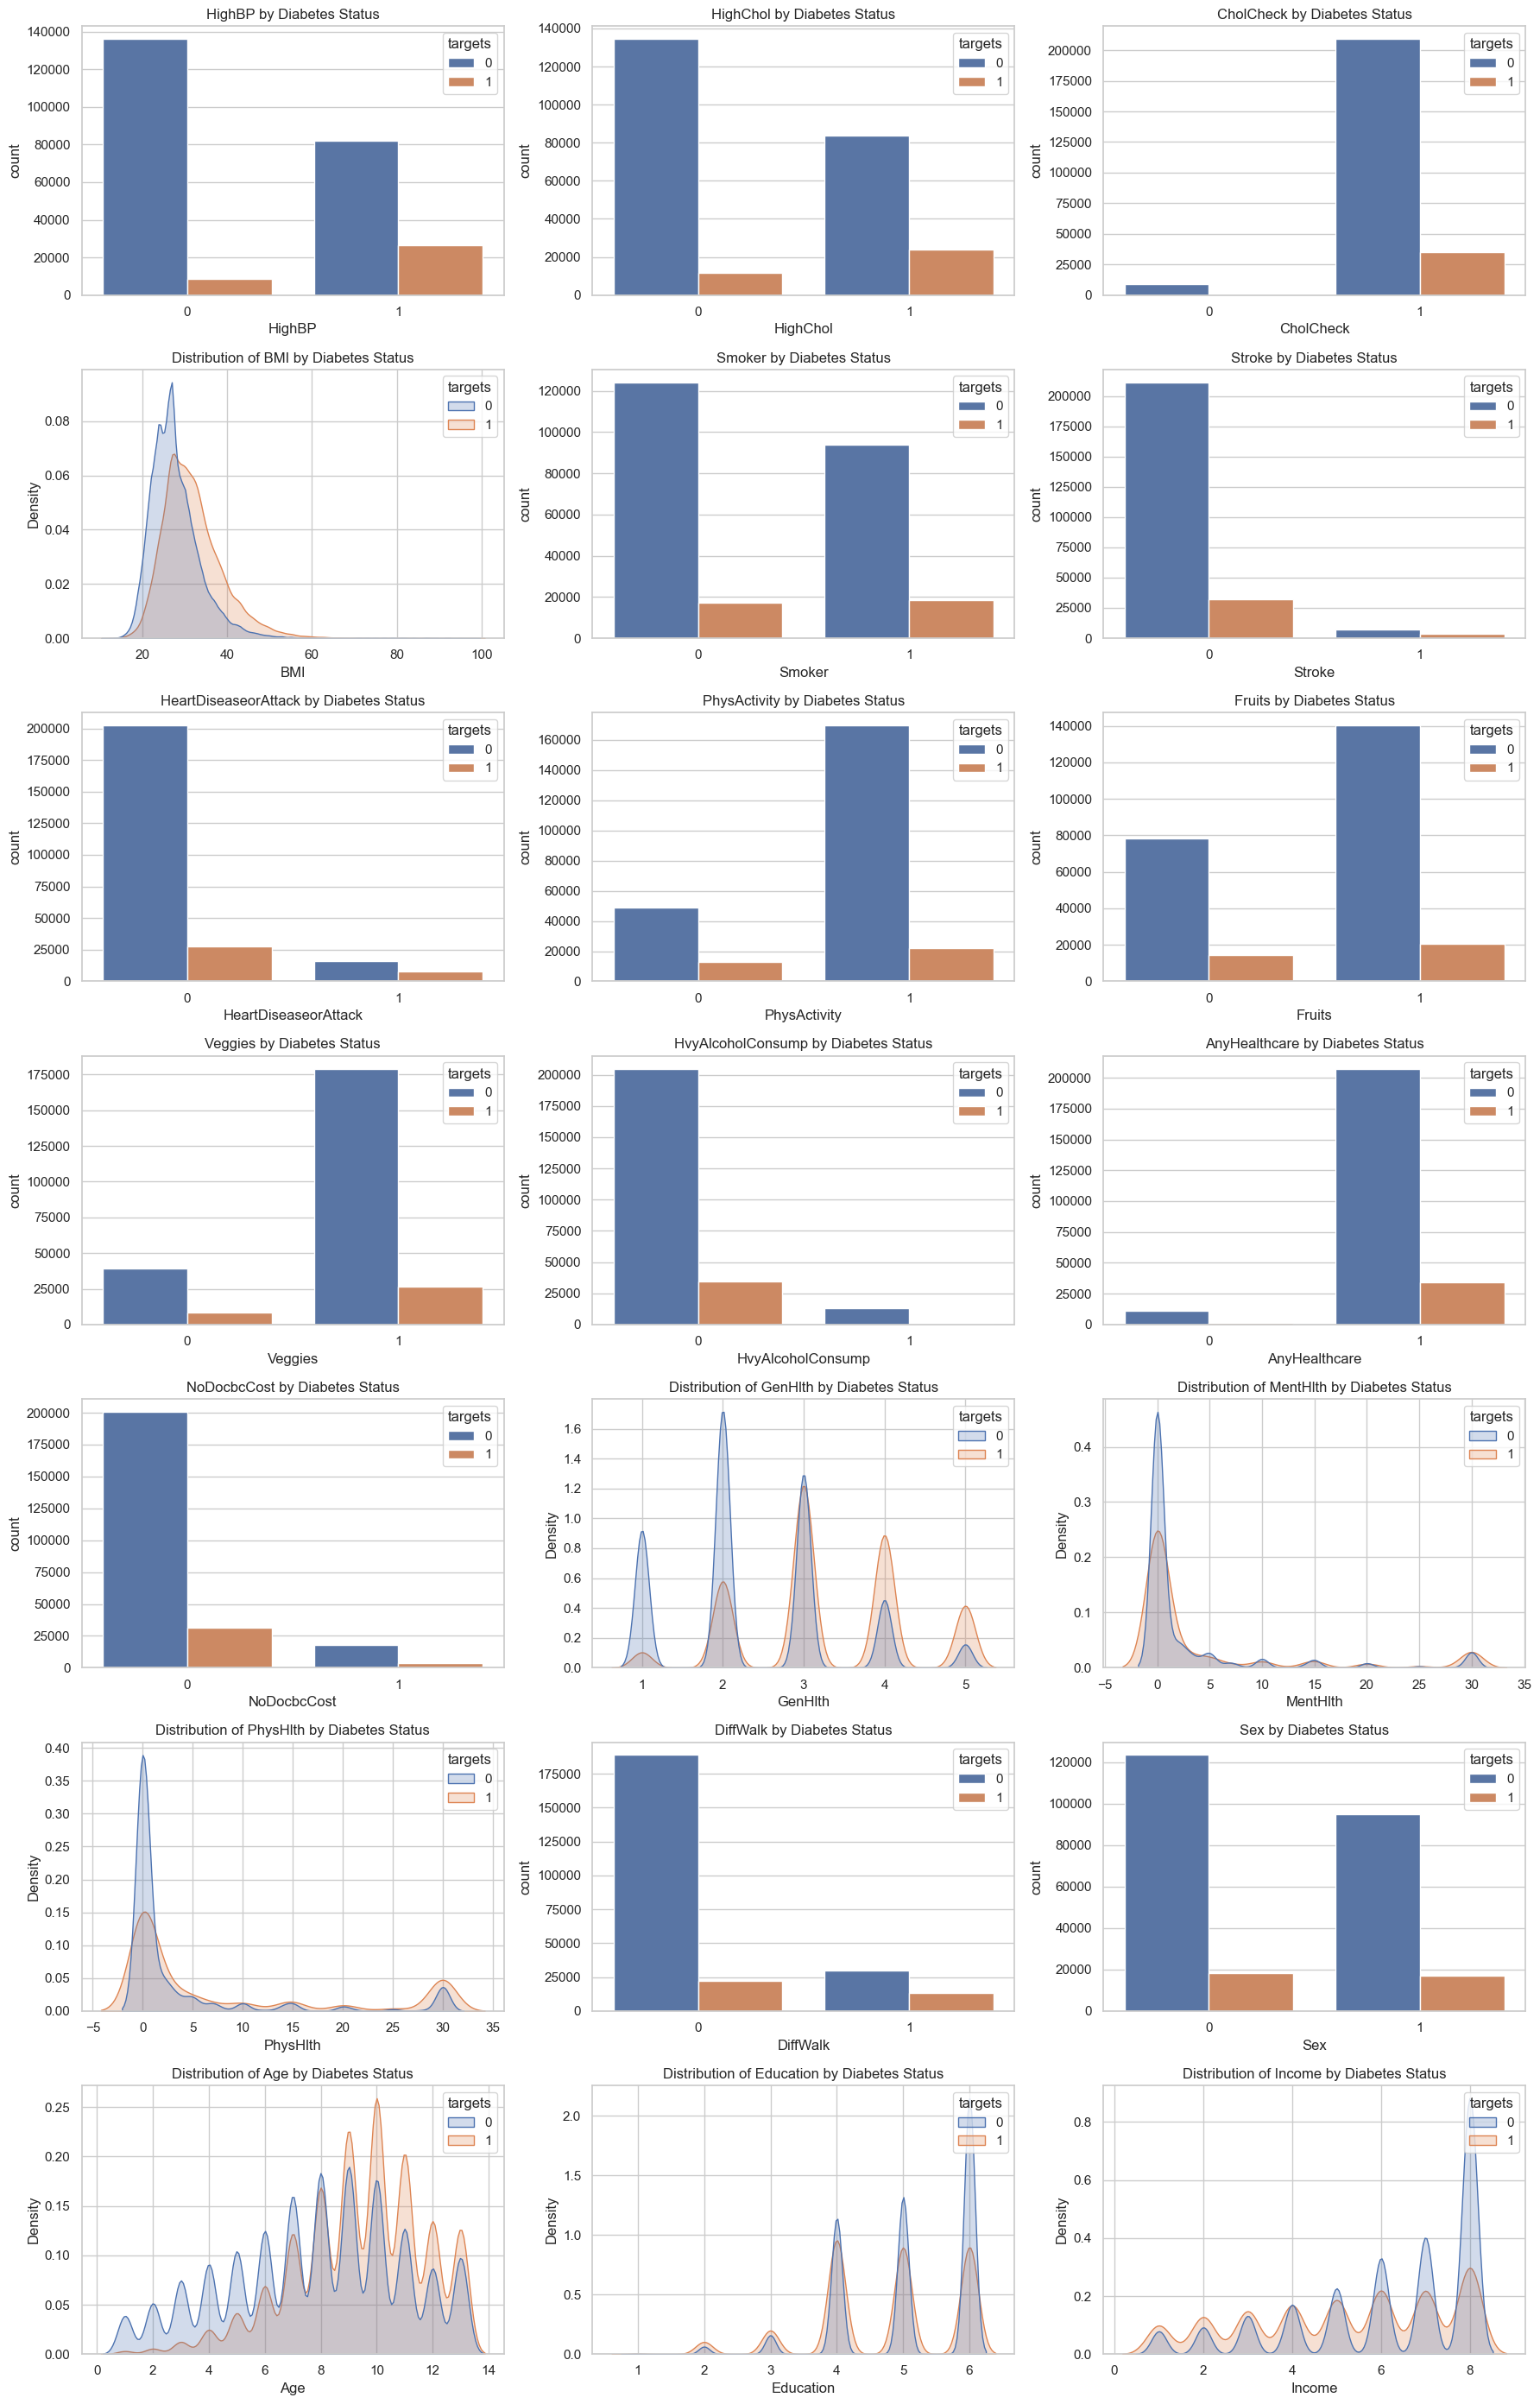

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate features
target_col = 'targets'
features = df.drop(columns=[target_col]).columns

# Set plot style
sns.set(style="whitegrid")
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    
    if df[col].nunique() <= 2:
        # Binary or categorical feature – use countplot
        sns.countplot(data=df, x=col, hue=target_col)
        plt.title(f"{col} by Diabetes Status")
    else:
        # Continuous feature – use KDE plot
        sns.kdeplot(data=df, x=col, hue=target_col, common_norm=False, fill=True)
        plt.title(f"Distribution of {col} by Diabetes Status")
    
    plt.tight_layout()

plt.show()

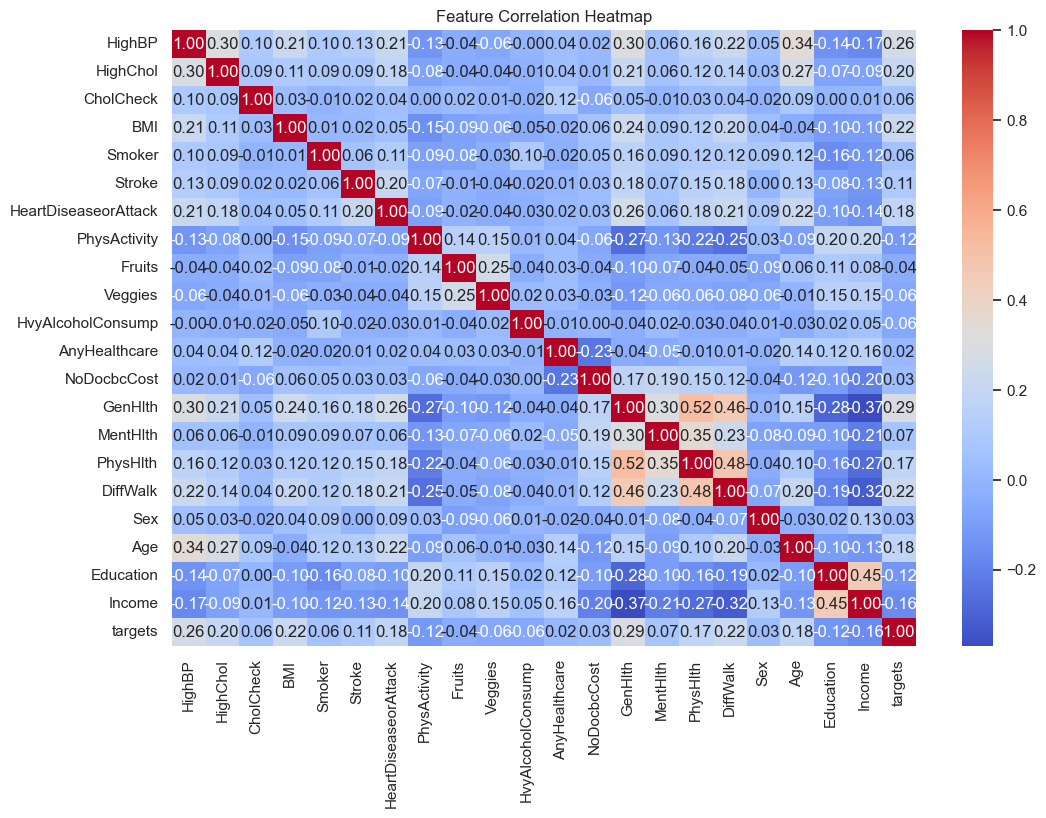

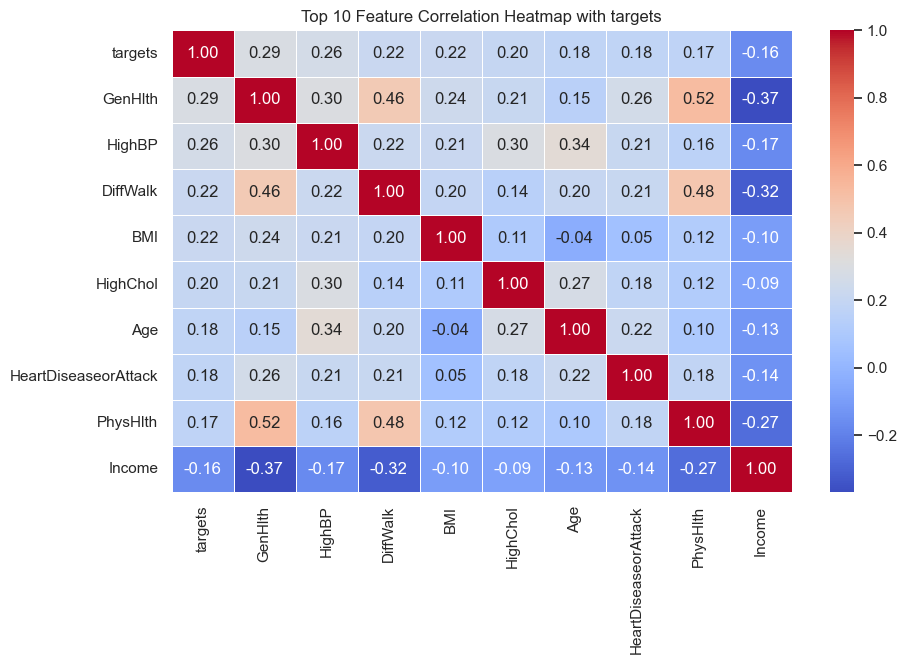

In [16]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Compute the correlation matrix
corr_matrix = df.corr()

# Get the top 10 features most correlated with the target variable (absolute values for ranking)
top_10_features = corr_matrix['targets'].abs().sort_values(ascending=False).index[:10]

# Filter the correlation matrix for the top 10 features
top_10_corr = corr_matrix.loc[top_10_features, top_10_features]

target_variable = 'targets'
top_10_features = corr_matrix[target_variable].abs().sort_values(ascending=False).index[:10]

# Plot heatmap for top 10 correlated features
plt.figure(figsize=(10,6))
sns.heatmap(top_10_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Top 10 Feature Correlation Heatmap with {target_variable}")
plt.show()

# Identify feature and target variables
X = df.drop(columns=['targets'])  # Independent variables
y = df['targets']  # Target variable

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
# Define feature matrix X and target vector y
X = df.drop(columns=['targets'])  # Replace 'targets' with your actual target column if different
y = df['targets']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize KNN (start with k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit model
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.8467557552822453

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     43739
           1       0.40      0.21      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.64      0.58      0.59     50736
weighted avg       0.82      0.85      0.83     50736

Confusion Matrix:
 [[41495  2244]
 [ 5531  1466]]


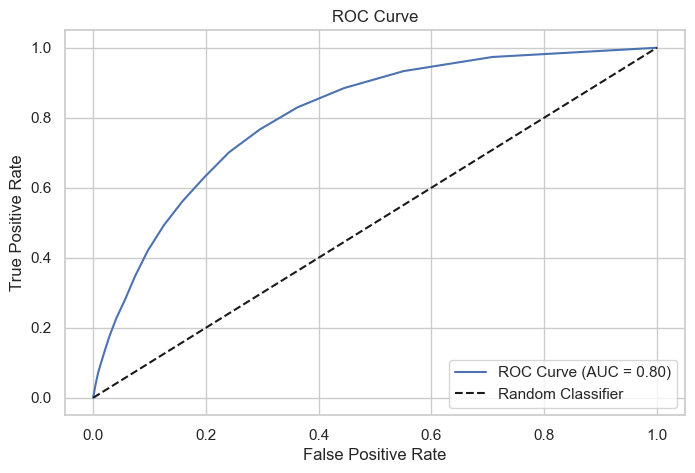

In [25]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Refit the KNN model with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Get probability estimates for the positive class
y_proba = knn.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


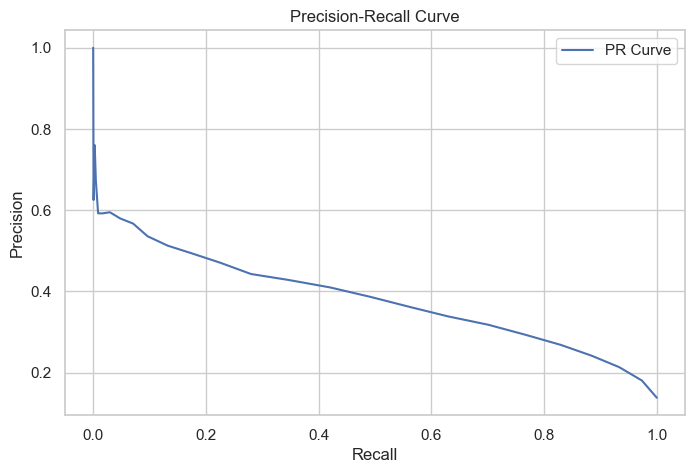

In [27]:
# PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label="PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [29]:
df.corr()['targets'].sort_values(ascending=False)

targets                 1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: targets, dtype: float64